In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")

import forces as fc
import molecules as mc

In [ ]:
pH = 6.7
m1 = mc.Molecule(np.array([0.0,0.0,0.0]),50)
m2 = mc.Molecule(np.array([200.0,0.0,0.0]),50)


#mc.dist(m1,m2)


print(fc.vdw(m1,m2))
#print(fc.steric(m1,m2))
#print(fc.elec_rep(m1,m2))

[2.8280268508087976, 2.3453130695303326, 1.9264562489109338, 1.5685340166709203, 1.2670574722996222, 1.0164482712140877, 0.8105536144179506, 0.6431132633632033, 0.5081248636346852, 0.4000890917867361, 0.31414300543892115, 0.2461045849660391, 0.1924554989512938, 0.15028653857553606, 0.11722467635840605, 0.09135482280492845, 0.07114435007807857, 0.05537472722511177, 0.04308210122026658, 0.033507111931025804, 0.026053369807776443, 0.020253616943733933, 0.0157424594202311, 0.01223458116529946, 0.00950744967098458, 0.007387655144385239, 0.005740160573550995, 0.004459867084630899, 0.003465010803482888, 0.00269200250443221, 0.0020914002146728075, 0.0016247693035826994, 0.0012622364623946795, 0.00098058542204587, 0.0007617751452026469, 0.0005917871983245812, 0.0004597294389827599, 0.0003571391784167643, 0.0002774415212579835, 0.00021552838390141672, 0.0001674313397809836, 0.00013006740068283211, 0.00010104148635345448, 7.849294909151253e-05, 6.097633239753262e-05, 4.7368730242487536e-05, 3.679

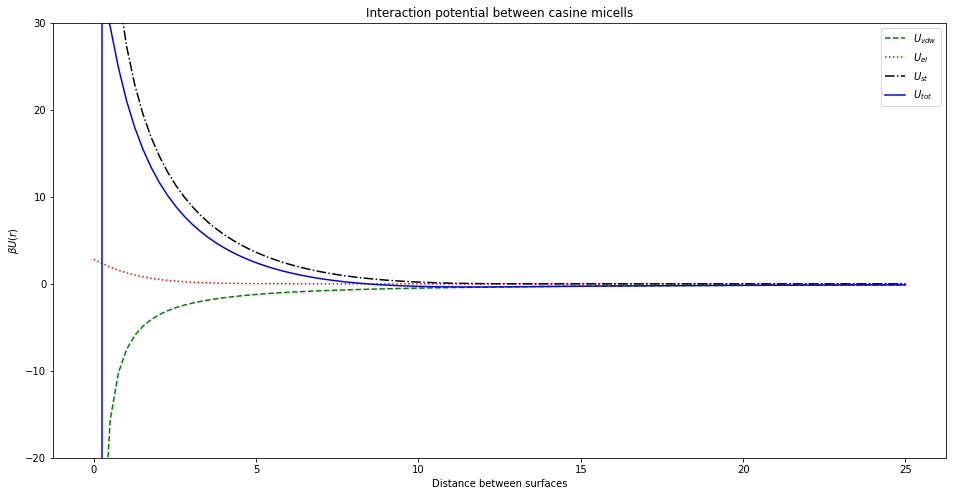

In [3]:
dists = np.linspace(0.00001,25,100)
vdws = []
ess = []
sters = []


for i in dists:
  radius = 100
  dist_between = 2*radius + i
  tm1 = mc.Molecule(np.array([0.0,0.0,0.0]),radius)
  tm2 = mc.Molecule(np.array([dist_between,0.0,0.0]),radius)
  vdws.append(fc.vdw(tm1,tm2))
  ess.append(fc.elec_rep(tm1,tm2))
  #ess.append(fc.elec_repv2(tm1,tm2))
  #ess.append(fc.elec_rep3(tm1,tm2))
  sters.append(fc.steric(tm1,tm2))

#print(dists)
#print(vdws)
print(ess)
#print(sters)

total_fs = [v + e + s for (v,e,s) in zip(vdws,ess,sters)]


plt.figure(figsize=(16,8))

plt.plot(dists, vdws, c="green", label = "$U_{vdw}$", linestyle='--')
plt.plot(dists,ess,c="red",label="$U_{el}$",linestyle=":")
plt.plot(dists,sters,color = "black", label="$U_{st}$",linestyle="-.")
plt.plot(dists,total_fs,color = "blue", label="$U_{tot}$")

plt.ylim((-20,30))
plt.title("Interaction potential between casine micells")
plt.xlabel("Distance between surfaces")
plt.ylabel(r"$\beta U(r)$")
plt.legend()
plt.show()

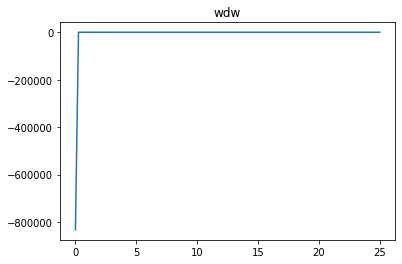

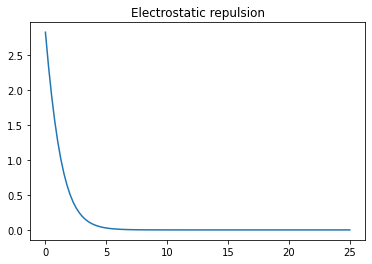

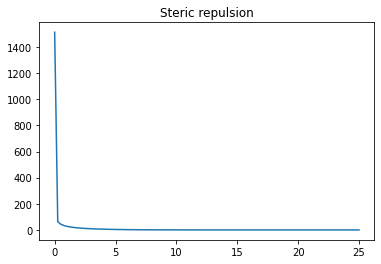

In [4]:
plt.plot(dists,vdws)
plt.title("wdw")
plt.show()
plt.plot(dists,ess)
plt.title("Electrostatic repulsion")
plt.show()
plt.plot(dists,sters)
plt.title("Steric repulsion")
plt.show()

In [5]:
print(sters)

[1512.5770940419359, 62.85640103981113, 43.3320747824736, 33.55768948305698, 27.32250714299187, 22.88110727139422, 19.509585118557737, 16.842128543826334, 14.669744240646025, 12.86250968042076, 11.33449493366766, 10.026100641962108, 8.89440319256649, 7.907527491979487, 7.041193762458428, 6.276506722611698, 5.59848902312325, 4.995078570374474, 4.456424945332762, 3.97438439288577, 3.54215005502733, 3.153976414492174, 2.804970690527806, 2.4909326736167263, 2.2082301733757714, 1.9537010336618628, 1.7245752305305801, 1.5184123358113681, 1.3330508679820456, 1.1665669335870854, 1.0172401983261374, 0.8835256914044753, 0.7640302899614692, 0.6574929867742149, 0.5627682378764786, 0.47881183406260297, 0.40466885344042114, 0.3394633398843681, 0.2823894206912238, 0.23270363056726898, 0.18971825169088483, 0.15279551355339707, 0.12134252350739072, 0.09480682090700432, 0.07267246552717349, 0.05445658545956868, 0.03970632156896156, 0.02799611537709444, 0.018925295328410426, 0.012115923108163219, 0.00721